In [121]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
import time

mpl.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 显示负号
# help(time)

In [122]:
# 采样点选择2000个，因为设置的信号频率分量最高为600赫兹，根据采样定理知采样频率要大于信号频率2倍，所以这里设置采样频率为2000赫兹（即一秒内有2000个采样点，一样意思的）
x = np.linspace(0, 1, 2048)

# 设置需要采样的信号，频率分量有200，400和600
y = 7 * np.sin(2 * np.pi * 200 * x) + 5 * np.sin(2 * np.pi * 400 * x) + 3 * np.sin(2 * np.pi * 600 * x)

np.savetxt('wave.txt',y)

In [123]:
start = time.process_time_ns()
fft_y = fft(y)  # 快速傅里叶变换
end = time.process_time_ns()
print('FFT 消耗时间为 %d ns' %(end-start))

FFT 消耗时间为 83317 ns


In [124]:
N = 2048    #2000的时候波形较平滑
x = np.arange(N)  # 频率个数
half_x = x[range(int(N / 2))]  # 取一半区间

In [125]:
abs_y = np.abs(fft_y)  # 取复数的绝对值，即复数的模(双边频谱)
normalization_y = abs_y / N  # 归一化处理（双边频谱）
normalization_half_y = normalization_y[range(int(N / 2))]  # 由于对称性，只取一半区间（单边频谱）

Text(0.5, 1.0, '原始波形')

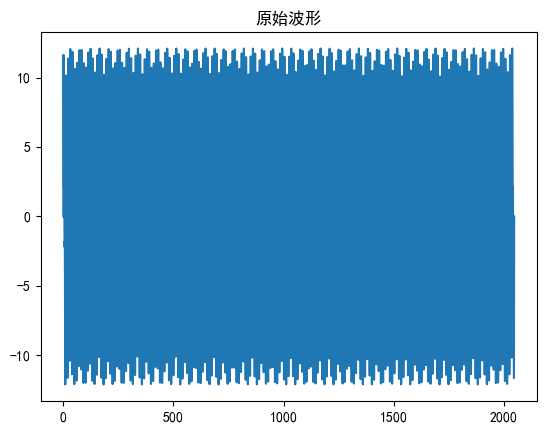

In [126]:
plt.plot(x, y)
plt.title('原始波形')

/home/lirui/devtools/miniconda3/envs/pytorch-cuda118/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, '双边振幅谱(未求振幅绝对值)')

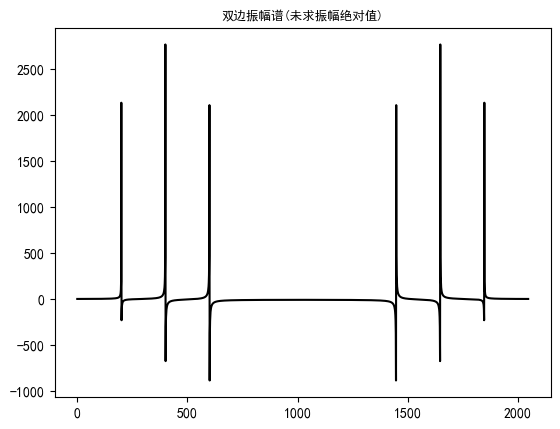

In [127]:
plt.plot(x, fft_y, 'black')
plt.title('双边振幅谱(未求振幅绝对值)', fontsize=9, color='black')

Text(0.5, 1.0, '双边振幅谱(未归一化)')

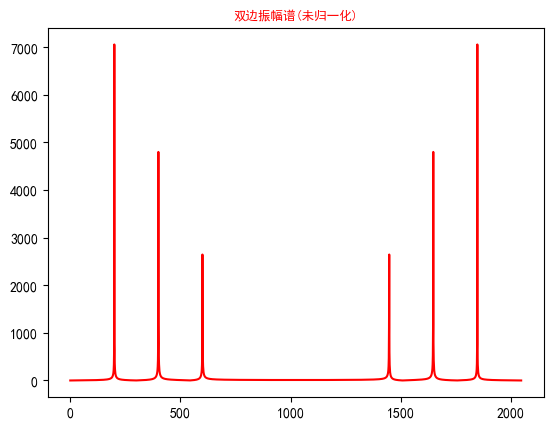

In [128]:
plt.plot(x, abs_y, 'r')
plt.title('双边振幅谱(未归一化)', fontsize=9, color='red')

Text(0.5, 1.0, '双边振幅谱(归一化)')

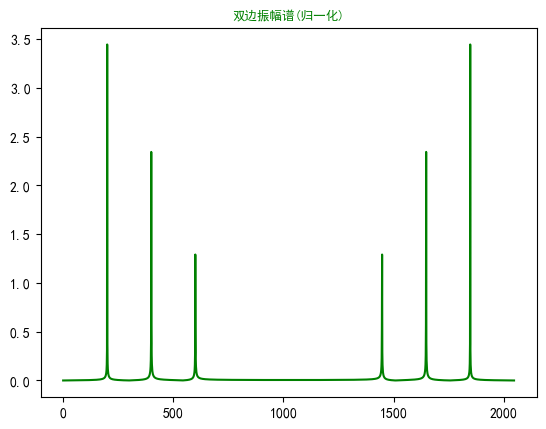

In [129]:
plt.plot(x, normalization_y, 'g')
plt.title('双边振幅谱(归一化)', fontsize=9, color='green')

1024


Text(0.5, 1.0, '单边振幅谱(归一化)')

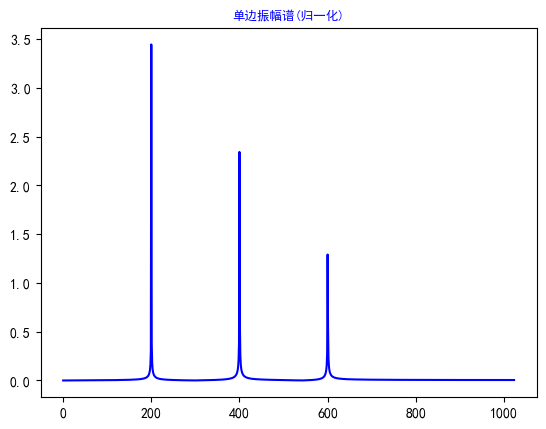

In [130]:
print(np.size(normalization_half_y)) 
plt.plot(half_x, normalization_half_y, 'blue')
plt.title('单边振幅谱(归一化)', fontsize=9, color='blue')

In [131]:
for i in range(1024):
    if(normalization_half_y[i]>0.5):
        print(normalization_half_y[i],i)


3.446238118902098 200
2.344144429024987 400
0.5714833418198907 401
1.2917378995717188 600
0.5428003069823122 601
